# Prepare MNIST Dataset and Neural Network

### Load Library

In [230]:
import numpy as np
import pandas as pd
import seaborn as sns

# visualise
import matplotlib.pyplot as plt

import pickle
import os

# plotly
# import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from PIL import Image

### Load MNIST DATA and store as image

In [231]:
# import MNIST data
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [232]:
# Reshape the data
image_vector_size = 28 * 28
x_train = x_train.reshape(x_train.shape[0], image_vector_size)
x_test = x_test.reshape(x_test.shape[0], image_vector_size)

# Create column names
column_names = [f"{i+1}x{j+1}" for i in range(28) for j in range(28)]

# Convert to DataFrame and set column names
x_train = pd.DataFrame(x_train, columns=column_names)
x_test = pd.DataFrame(x_test, columns=column_names)

# Convert y_train and y_test to DataFrames
y_train = pd.DataFrame(y_train, columns=['label'])
y_test = pd.DataFrame(y_test, columns=['label'])

# Display first few rows to confirm
x_train.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [233]:
# Normalize the dataset and reshape it for the CNN
# x_train = x_train / 255.0
# x_test = x_test / 255.0

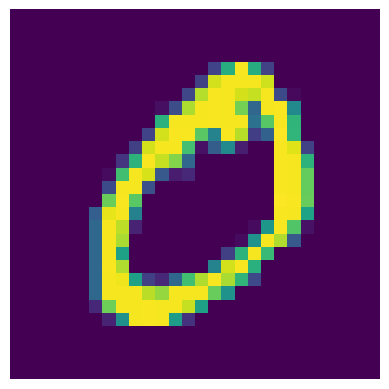

In [234]:
# visualise
img = x_train.iloc[1,:].array.reshape(28,28)
plt.imshow(img)
plt.axis("off")
plt.show()

Since color information does not contribute to the classification process, converting images to grayscale simplifies the data, reducing complexity without compromising accuracy.

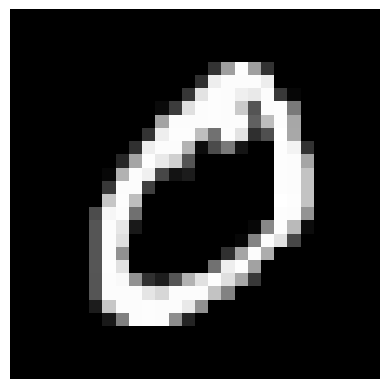

In [235]:
# visualise again
img = x_train.iloc[1, :].values.reshape(28, 28)  # Get the image data
plt.imshow(img, cmap="gray")  # Display in grayscale
plt.axis("off")  # Hide axis
plt.show()

### EDA

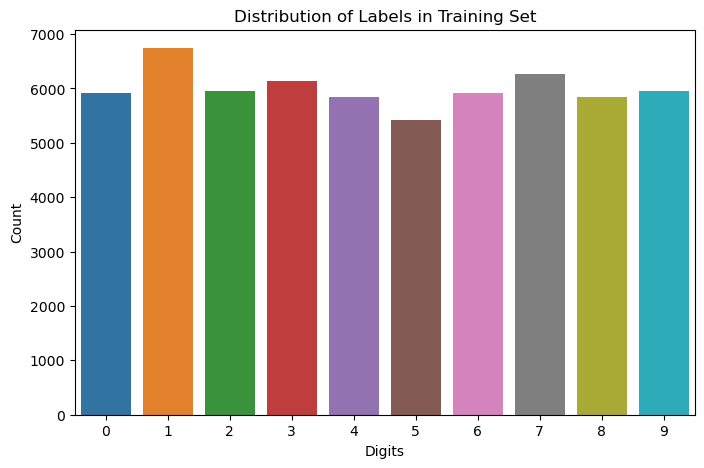

In [236]:
# Distribution of Labels in Training Set
plt.figure(figsize=(8, 5))
sns.countplot(x=y_train["label"].values)
plt.title("Distribution of Labels in Training Set")
plt.xlabel("Digits")
plt.ylabel("Count")
plt.show()

The dataset is considered balanced due to the approximately equal number of samples across each category.

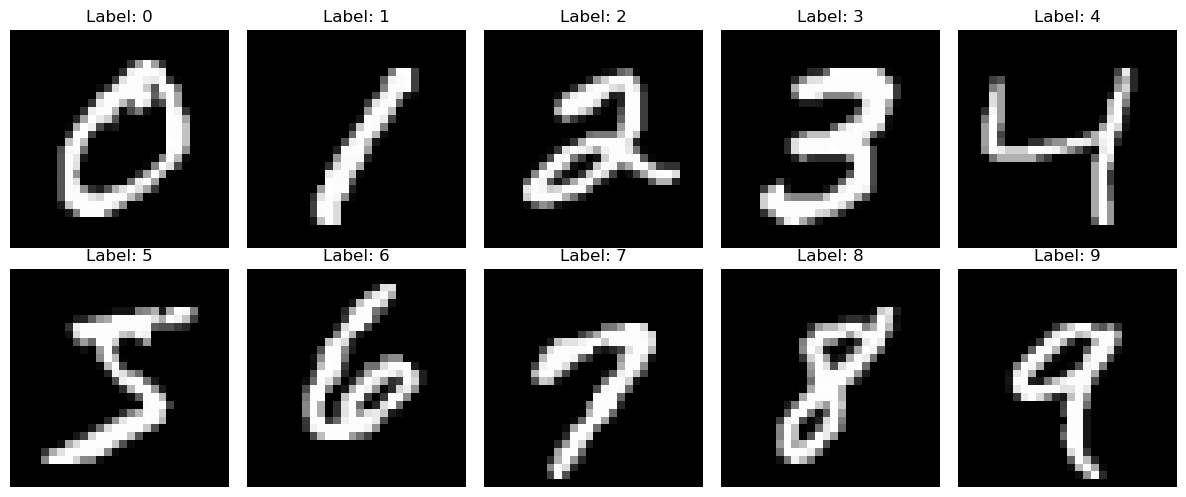

In [237]:
# Visualize Sample Images for Each Label
# Collect a single sample for each label (0-9) to visualize
sample_indices = [y_train[y_train['label'] == i].index[0] for i in range(10)]

fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for idx, ax in enumerate(axes.flat):
    # Reshape the vector back to 28x28 and display it
    img = x_train.iloc[sample_indices[idx], :].values.reshape(28, 28)
    ax.imshow(img, cmap="gray")
    ax.axis("off")
    ax.set_title(f"Label: {y_train.iloc[sample_indices[idx], 0]}")  # Access directly without .values
plt.tight_layout()
plt.show()

In [138]:
# Check for Missing Values
print("Missing values in x_train:", x_train.isnull().sum().sum())
print("Missing values in x_test:", x_test.isnull().sum().sum())

Missing values in x_train: 0
Missing values in x_test: 0


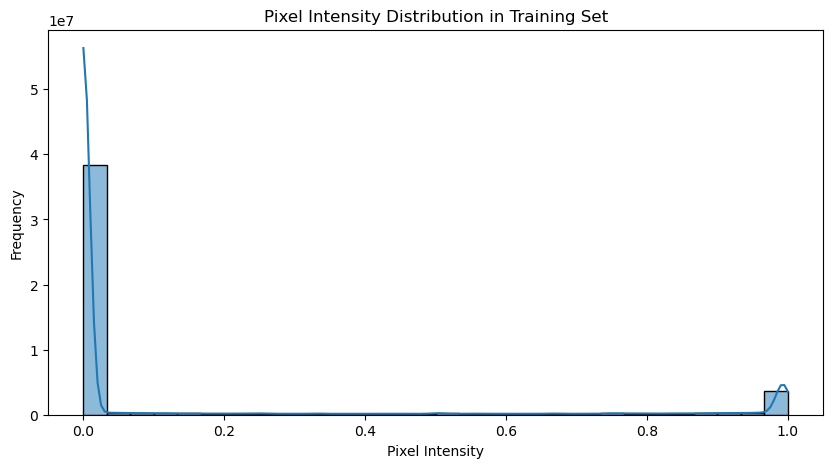

In [82]:
# Pixel Intensity Analysis
# Flatten the data and plot pixel intensity distribution
plt.figure(figsize=(10, 5))
sns.histplot(x_train.values.flatten(), bins=30, kde=True)
plt.title("Pixel Intensity Distribution in Training Set")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()

This is consistent with our expectations, as the digit are bright, while the background remains black.

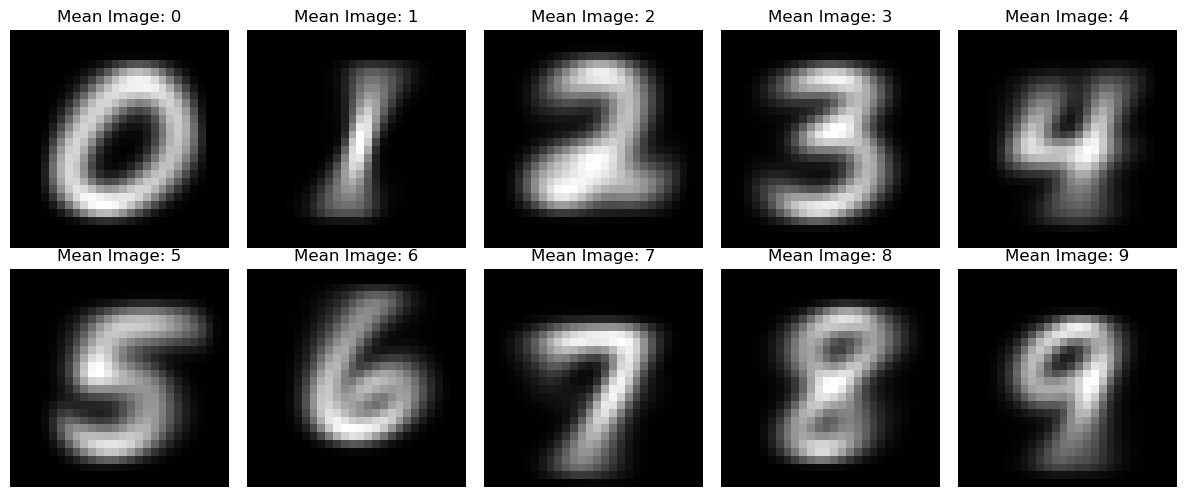

In [140]:
# Mean Image for Each Digit
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i, ax in enumerate(axes.flat):
    # Calculate the mean image for each label
    mean_img = x_train[y_train['label'] == i].mean(axis=0).values.reshape(28, 28)
    ax.imshow(mean_img, cmap="gray")
    ax.axis("off")
    ax.set_title(f"Mean Image: {i}")
plt.tight_layout()
plt.show()

The mean image for each digit remains distinct and easily identifiable, indicating that the sample values exhibit minimal variability.

In [243]:
# Create directories to save images
os.makedirs('../data/MNIST/train', exist_ok=True)
os.makedirs('../data/MNIST/test', exist_ok=True)

# Save x_train images
for index, row in x_train.iterrows():
    image_array = row.values.reshape(28, 28).astype(np.uint8)  # Reshape and convert to uint8
    image = Image.fromarray(image_array)  # Create an image from the array
    image.save(f'../data/MNIST/train/image_{index+1}.JPEG')  # Save the image

# Save x_test images
for index, row in x_test.iterrows():
    image_array = row.values.reshape(28, 28).astype(np.uint8)  # Reshape and convert to uint8
    image = Image.fromarray(image_array)  # Create an image from the array
    image.save(f'../data/MNIST/test/image_{index+1}.JPEG')  # Save the image

print("Images saved successfully!")

Images saved successfully!


In [244]:
# Define paths to the train and test image directories
train_dir = '../data/MNIST/train'
test_dir = '../data/MNIST/test'

# Function to count the number of images in a directory
def count_images(directory):
    return len([name for name in os.listdir(directory) if name.endswith('.JPEG')])

# Count images in the training directory
train_image_count = count_images(train_dir)
print(f'Number of images in the training folder: {train_image_count}')

# Count images in the testing directory
test_image_count = count_images(test_dir)
print(f'Number of images in the testing folder: {test_image_count}')

Number of images in the training folder: 60000
Number of images in the testing folder: 10000


In [246]:
# Create dictionary for training data
train_data_dict = {f'image_{index + 1}': int(y_train.iloc[index]['label']) for index in range(len(y_train))}

# Create dictionary for testing data
test_data_dict = {f'image_{index + 1}': int(y_test.iloc[index]['label']) for index in range(len(y_test))}

# Save dictionaries to pickle files
with open('../data/MNIST/train_data.pickle', 'wb') as f:
    pickle.dump(train_data_dict, f)

with open('../data/MNIST/test_data.pickle', 'wb') as f:
    pickle.dump(test_data_dict, f)

print("Pickle files created successfully!")

Pickle files created successfully!


In [247]:
with open('../data/MNIST/train_data.pickle', 'rb') as file:
    wnid_to_label = pickle.load(file)
wnid_to_label

{'image_1': 5,
 'image_2': 0,
 'image_3': 4,
 'image_4': 1,
 'image_5': 9,
 'image_6': 2,
 'image_7': 1,
 'image_8': 3,
 'image_9': 1,
 'image_10': 4,
 'image_11': 3,
 'image_12': 5,
 'image_13': 3,
 'image_14': 6,
 'image_15': 1,
 'image_16': 7,
 'image_17': 2,
 'image_18': 8,
 'image_19': 6,
 'image_20': 9,
 'image_21': 4,
 'image_22': 0,
 'image_23': 9,
 'image_24': 1,
 'image_25': 1,
 'image_26': 2,
 'image_27': 4,
 'image_28': 3,
 'image_29': 2,
 'image_30': 7,
 'image_31': 3,
 'image_32': 8,
 'image_33': 6,
 'image_34': 9,
 'image_35': 0,
 'image_36': 5,
 'image_37': 6,
 'image_38': 0,
 'image_39': 7,
 'image_40': 6,
 'image_41': 1,
 'image_42': 8,
 'image_43': 7,
 'image_44': 9,
 'image_45': 3,
 'image_46': 9,
 'image_47': 8,
 'image_48': 5,
 'image_49': 9,
 'image_50': 3,
 'image_51': 3,
 'image_52': 0,
 'image_53': 7,
 'image_54': 4,
 'image_55': 9,
 'image_56': 8,
 'image_57': 0,
 'image_58': 9,
 'image_59': 4,
 'image_60': 1,
 'image_61': 4,
 'image_62': 4,
 'image_63': 6,
 

## Construct Neural Network (pre-training model)

In [211]:
# Select the first 300 samples from x_train and y_train
x_train_sample = x_train.iloc[:1000]  # First 1000 rows of x_train
y_train_sample = y_train.iloc[:1000]    # First 1000 rows of y_train

x_test_sample = x_test.iloc[:500]  # First 100 rows of x_test
y_test_sample = y_test.iloc[:500]    # First 100 rows of y_test

In [212]:
model_1 = nn.Sequential(
    nn.Conv2d(1, 28, 5, stride=1),
    nn.MaxPool2d(2, 2),
    nn.Conv2d(28, 26, 5, stride=1),
    nn.ReLU(),
    nn.Flatten(),
    nn.Linear(26 * 8 * 8, 128),
    nn.ReLU(),
    nn.Linear(128, 10),
    nn.Softmax()
)

In [213]:
model = model_1
model.to(device)

Sequential(
  (0): Conv2d(1, 28, kernel_size=(5, 5), stride=(1, 1))
  (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (2): Conv2d(28, 26, kernel_size=(5, 5), stride=(1, 1))
  (3): ReLU()
  (4): Flatten(start_dim=1, end_dim=-1)
  (5): Linear(in_features=1664, out_features=128, bias=True)
  (6): ReLU()
  (7): Linear(in_features=128, out_features=10, bias=True)
  (8): Softmax(dim=None)
)

In [214]:
# Convert DataFrames to tensors
x_train_tensor = torch.tensor(x_train.values, dtype=torch.float32).unsqueeze(1)  # Add channel dimension
y_train_tensor = torch.tensor(y_train.values.flatten(), dtype=torch.long)  # Flatten y_train to be a 1D tensor

# Create TensorDatasets and DataLoaders
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

In [215]:
from torch.nn import CrossEntropyLoss
import torch.optim as optim

In [216]:
criterion = CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-3)
epochs = 100

In [217]:
for e in range(epochs):
    model.train()
    sum_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Reshape inputs to the expected shape
        inputs = inputs.view(-1, 1, 28, 28)  # reshape because previously flatten

        optimizer.zero_grad()

        y_hat = model(inputs)
        loss = criterion(y_hat, labels)
        
        loss.backward()
        optimizer.step()
        
        sum_loss += loss.item()
    
    avg_loss = sum_loss / len(train_loader.dataset)
    print(f"epoch #{e + 1}")
    print(f"loss: {avg_loss}")

epoch #1
loss: 0.03598885102669398
epoch #2
loss: 0.03598109420935313
epoch #3
loss: 0.035972546470165255
epoch #4
loss: 0.03596261258522669


KeyboardInterrupt: 

In [ ]:
# Convert DataFrames to tensors
x_test_tensor = torch.tensor(x_test_sample.values, dtype=torch.float32).unsqueeze(1)  # Add channel dimension
y_test_tensor = torch.tensor(y_test_sample.values.flatten(), dtype=torch.long)  # Flatten y_train to be a 1D tensor

# Create TensorDatasets and DataLoaders
test_dataset = TensorDataset(x_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=True)

In [ ]:
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device) 
        
        # Reshape inputs to the expected shape
        inputs = inputs.view(-1, 1, 28, 28)  # reshape because previously flatten

        outputs = model(inputs)
        
        _, predicted = torch.max(outputs, 1)
        
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

accuracy = 100 * correct / total
print(f'Test Accuracy: {accuracy:.2f}%')

## Method for Dataloading in GPQF

In [84]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import numpy as np
from PIL import Image
import random
import os
import glob
import re
import pickle
from utils import parse_imagenet_val_labels

In [25]:
def seed_worker(worker_id):
    worker_seed = torch.initial_seed() % 2**32
    np.random.seed(worker_seed)
    random.seed(worker_seed)

g = torch.Generator()
g.manual_seed(0)
# use above function and g to preserve reproducibility.

In [111]:
 class Imagenet(Dataset):
     """
     Validation dataset of Imagenet
     """
     def __init__(self, data_dir, transform):
         # we can maybe pput this into diff files.
         #df = pd.read_csv(data_dir + "/y_train_sample.csv")
         #self.Y = torch.from_numpy(df.values).long().squeeze()
         #self.X_path = sorted(glob.glob(os.path.join(data_dir, 'MNIST_img_train/*.JPEG')), 
             #key=lambda x: re.search('%s(.*)%s' % ('MNIST_img_train/', '.JPEG'), x).group(1))
            
         self.Y = torch.from_numpy(parse_imagenet_val_labels(data_dir)).long()
         self.X_path = sorted(glob.glob(os.path.join(data_dir, 'ILSVRC2012_img_val/*.JPEG')), 
             key=lambda x: re.search('%s(.*)%s' % ('ILSVRC2012_img_val/', '.JPEG'), x).group(1))
         self.transform = transform

     def __len__(self):
         return len(self.X_path)
    
     def __getitem__(self, idx):
         img = Image.open(self.X_path[idx]).convert('RGB')
         y = self.Y[idx] 
         if self.transform:
             x = self.transform(img)
         return x, y

In [131]:
def data_loader(ds_name, batch_size, num_workers): 
    """
    Prepare data loaders
    """
    if ds_name == 'ILSVRC2012':
        data_dir = '../data/ILSVRC2012'

        if not os.path.isdir(data_dir):
            raise Exception('Please download Imagenet2012 dataset!')

        transform = transforms.Compose([
            transforms.Resize(256), 
            transforms.CenterCrop(224),  
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])
        
        train_ds = torchvision.datasets.ImageFolder(os.path.join(data_dir, 'ILSVRC2012_img_train'),
                                                    transform=transform)
        
        if not os.path.isfile('../data/ILSVRC2012/wnid_to_label.pickle'):
            with open('../data/ILSVRC2012/wnid_to_label.pickle', 'wb') as f:
                pickle.dump(train_ds.class_to_idx, f)         

        test_ds = Imagenet(data_dir, transform) 
        train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=num_workers,
                              worker_init_fn=seed_worker, generator=g)
        test_dl = DataLoader(test_ds, min(batch_size, 1024), shuffle=False,
                             num_workers=num_workers) 

    elif ds_name == 'MNIST':
        data_dir = '../data/MNIST'
        
        transform = transforms.Compose([
            transforms.Grayscale(num_output_channels=1),
            transforms.Resize((28, 28)),
            transforms.ToTensor(),
            transforms.Normalize((0.1307,), (0.3081,))
        ])
        
        train_ds = torchvision.datasets.ImageFolder(os.path.join(data_dir, 'x_train_sample'), transform=transform)
        test_ds = torchvision.datasets.ImageFolder(os.path.join(data_dir, 'x_test_sample'), transform=transform)
        
        train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True,
                              num_workers=num_workers, worker_init_fn=seed_worker, generator=g)
        test_dl = DataLoader(test_ds, batch_size=min(batch_size, 1024), shuffle=False,
                             num_workers=num_workers)
    return train_dl, test_dl 

In [113]:
data_loader('ILSVRC2012', 4, 2)

(<torch.utils.data.dataloader.DataLoader at 0x157173d10>,
 <torch.utils.data.dataloader.DataLoader at 0x2b667e110>)

In [129]:
data_loader('MNIST', 4, 2)

(<torch.utils.data.dataloader.DataLoader at 0x2d94733d0>,
 <torch.utils.data.dataloader.DataLoader at 0x2d93ebed0>)